In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### flux limits

In [1]:
import sympy
sympy.init_printing()
(u_max, u_star, rho_max, 
 rho_star, A, B) = sympy.symbols('u_max u_star rho_max rho_star A B')
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
rho_sol = sympy.solve(eq4,rho_star)[0]
B_sol = sympy.solve(eq1,B)[0]
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
A_sol = sympy.solve(quadA, A)
aval_a = A_sol[0].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
aval_b = A_sol[1].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
if aval_a > aval_b:
    aval = aval_a
else:
    aval = aval_b
print('A is:','%.5f'%aval)
bval = B_sol.evalf(subs={rho_max:15.0,A:aval} )
print('B is:','%.5f'%bval)


A is: 0.01977
B is: 0.00313


### coding assignment

Text(0.5,0,'Distance')

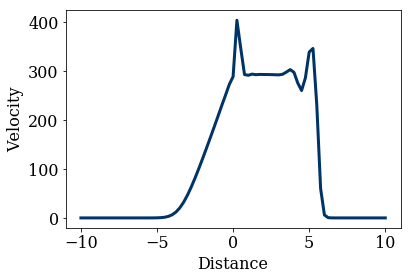

In [91]:
nx=81 
dx=0.25
dt=0.0002
nt= 50
gamma=1.4
x=np.linspace(-10,10,nx)
U=np.zeros((3,81))

def et(p,gamma,u,rou):
    return p/((gamma-1)*rou)+0.5*(u**2)

###initail condition of left side
rou_l =1 
u_l =0 
p_l =100000
et_l=et(p_l,gamma,u_l,rou_l)
u0_l=[rou_l,rou_l*u_l,rou_l*et_l]


###initial conditions of right side
rou_r =0.125
u_r=0
p_r=10000
et_r=et(p_r,gamma,u_r,rou_r)
u0_r=[rou_r,rou_r*u_r,rou_r*et_r]


i=0
while i<=2:
    U[i,0:41]=u0_l[i]
    U[i,41:81]=u0_r[i]
    i=i+1

def F(N):
    F=np.zeros((3,81))
    u1=N[0,:]
    u2=N[1,:]
    u3=N[2,:]
    F[0,:]=u2
    F[1,:]=(u2**2)/u1+(gamma-1)*(u3-(u2**2)/(2*u1))
    F[2,:]=u2/u1*(u3+(gamma-1)*(u3-(u2**2)/(2*u1)))
    return F


Ui= U.copy()
U_p = U.copy()
U_m =U.copy()

i=1
while i<=nt:
    f1=F(U)
    U_p[:,0:79]=1/2*(U[:,1:80]+U[:,0:79])-dt/(2*dx)*(f1[:,1:80]-f1[:,0:79])   
    U_m[:,1:80]=U_p[:,0:79]
    f2=F(U_p)
    f3=F(U_m)
    Ui[:,1:79]=U[:,1:79]-dt/dx*(f2[:,1:79]-f3[:,1:79])
    Ui[:,80]=Ui[:,79]
    Ui[:,0]=Ui[:,1]
    U=Ui
    i=i+1

Velocity=U[1,:]/U[0,:]
Rho=U[0,:]
Pressure= (U[2,:]-0.5*U[1,:]**2/U[0,:])*(gamma-1)

pyplot.plot(x, Velocity, color='#003366', ls='-', lw=3)
pyplot.ylabel('Velocity')
pyplot.xlabel('Distance')

Text(0.5,0,'Distance')

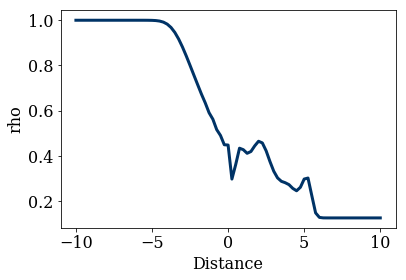

In [90]:
pyplot.plot(x, Rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('rho')
pyplot.xlabel('Distance')

Text(0.5,0,'Distance')

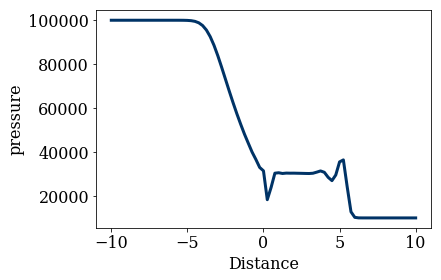

In [92]:
pyplot.plot(x, Pressure, color='#003366', ls='-', lw=3)
pyplot.ylabel('pressure')
pyplot.xlabel('Distance')

In [94]:
print('the velocity at x=2.5 is:','%.2f'%Velocity[51],'m/s')

the velocity at x=2.5 is: 292.61 m/s


In [95]:
print('the pressure at x=2.5 is:','%.2f'%Pressure[51],'N/m2')

the pressure at x=2.5 is: 30250.89 N/m2


In [96]:
print('the density at x=2.5 is:','%.2f'%Rho[51],'kg/m3')

the density at x=2.5 is: 0.37 kg/m3
